In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('/content/drive/MyDrive/PRAKTIKUM ML/Praktikum06/Data/klasifikasimhs.csv')

df.head()



,Tempat Tinggal,Pekerjaan Orang Tua,Penghasilan Orang Tua,Jumlah Tanggungan Orang Tua,Kendaraan,Kelayakan Keringanan UKT
0,0,PNS,10000000,3,1,0
1,0,TNI/POLRI,8000000,2,2,1
2,1,Petani,4000000,4,0,0
3,1,Nelayan,3000000,5,1,0
4,0,Buruh,2000000,2,1,1


In [3]:
df.info()

df.isnull().sum()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Tempat Tinggal               100 non-null    int64 
 1   Pekerjaan Orang Tua          100 non-null    object
 2   Penghasilan Orang Tua        100 non-null    int64 
 3   Jumlah Tanggungan Orang Tua  100 non-null    int64 
 4   Kendaraan                    100 non-null    int64 
 5   Kelayakan Keringanan UKT     100 non-null    object
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


,Tempat Tinggal,Penghasilan Orang Tua,Jumlah Tanggungan Orang Tua,Kendaraan
count,100.000000,1.000000e+02,100.000000,100.000000
mean,0.500000,5.427000e+06,2.590000,1.070000
std,0.502519,2.533128e+06,1.129002,0.655282
min,0.000000,7.000000e+05,1.000000,0.000000
25%,0.000000,3.000000e+06,2.000000,1.000000
50%,0.500000,5.500000e+06,2.000000,1.000000
75%,1.000000,8.000000e+06,3.250000,1.250000
max,1.000000,1.000000e+07,5.000000,2.000000


In [22]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

print("\nData setelah di-encode:")
display(df.head())



Data setelah di-encode:


,Tempat Tinggal,Pekerjaan Orang Tua,Penghasilan Orang Tua,Jumlah Tanggungan Orang Tua,Kendaraan,Kelayakan Keringanan UKT
0,0,4,9,2,1,0
1,0,6,7,1,2,1
2,1,5,3,3,0,0
3,1,3,2,4,1,0
4,0,0,1,1,1,1


In [23]:
X = df.drop(['Kelayakan Keringanan UKT'], axis=1)
y = df['Kelayakan Keringanan UKT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data berhasil dipisahkan!")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


Data berhasil dipisahkan!
X_train: (80, 5)
X_test: (20, 5)


In [24]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))



Akurasi Model: 0.9

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.88      1.00      0.94        15

    accuracy                           0.90        20
   macro avg       0.94      0.80      0.84        20
weighted avg       0.91      0.90      0.89        20



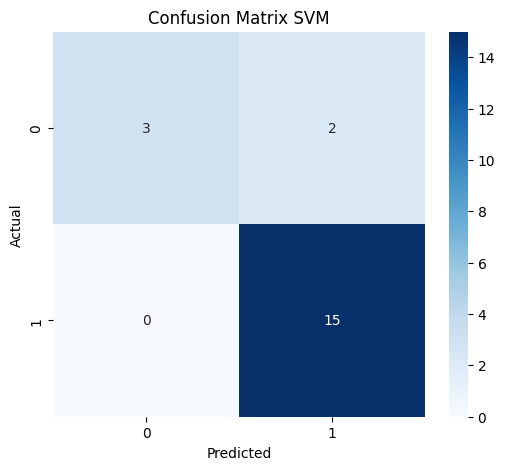

In [25]:
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [18]:
from sklearn.svm import SVC

model = SVC(kernel='linear')

model.fit(X_train, y_train)

print("Model SVM berhasil dilatih!")


Model SVM berhasil dilatih!


In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Akurasi: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.88      1.00      0.94        15

    accuracy                           0.90        20
   macro avg       0.94      0.80      0.84        20
weighted avg       0.91      0.90      0.89        20


Confusion Matrix:
 [[ 3  2]
 [ 0 15]]


Perbandingan Data Aktual dan Prediksi:


,Actual,Predicted
83,1,1
53,1,1
70,1,1
45,1,1
44,1,1
39,1,1
22,1,1
80,1,1
10,1,1
0,0,1


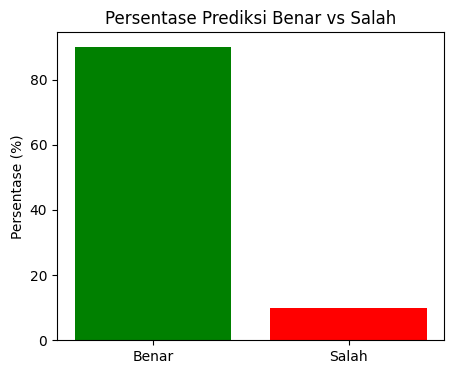

In [28]:
hasil = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Perbandingan Data Aktual dan Prediksi:")
display(hasil.head(10))

akurasi = accuracy_score(y_test, y_pred) * 100
plt.figure(figsize=(5,4))
plt.bar(['Benar', 'Salah'], [akurasi, 100-akurasi], color=['green','red'])
plt.title('Persentase Prediksi Benar vs Salah')
plt.ylabel('Persentase (%)')
plt.show()
